# Encuesta de Hospitales Exploration

## Import Libraries

In [98]:
import pandas as pd
import csv
import numpy as np
import seaborn as sns
sns.set()

## Read Data

In [4]:

# _enHospObj = pd.ExcelFile('dataset/Encuesta Nacional de Hospitales versión Diálisis(Responses).xlsx')
# enHospDf = pd.read_excel('dataset/Encuesta Nacional de Hospitales versión Diálisis(Responses).xlsx',sheet_name=_enHospObj.sheet_names[0])


enHospDf = pd.read_csv('dataset/Encuesta Nacional de Hospitales.csv')

## First Exploration iteration

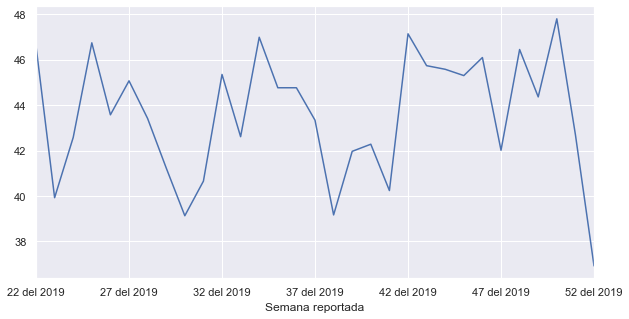

In [181]:
# 118 Columns

# enHospDf.info() # float(10 columns), int(64 columns), object(93 columns)

# enHospDf.isna().sum().sum() #17,539 null datapoints

# nullValues = enHospDf.isnull().mean().sort_values(ascending = False) # Percentage of Null Values per column

# nullValues[nullValues > 0.1].count() # 46 columns have more than 10% null Values

# nullValues.head() # Top 5 Variables have more than 87% of their values missing

con = pd.concat([idData,espOp],axis = 1)
meds = con.iloc[:,14:-9]

# Drop Never existed
meds[meds == 'Nunca ha existido'] = np.nan
meds = meds.dropna()

# Change Values to Ordinal
meds[meds == 'Todos los días'] = 3
meds[meds == 'Entre 3 y 5 días'] = 2
meds[meds == 'Entre 1 y 2 días'] = 1
meds[meds == 'No hubo'] = 0

# Create Sum of each row
meds['sum'] = meds.sum(axis = 1)

# Create scores of each week
meds['ScoreWeek'] = 100 - ((meds['sum']/(3*20)*100))

# Join with ID data
medsCon = pd.concat([idData,meds],axis = 1)

# Group each score by hospital or state
# medsCon.groupby('1.- Código del Hospital ').mean()
# medsCon.groupby('2.- Entidad Federal',).mean()
# medsCon.groupby('Semana reportada')['ScoreWeek'].mean().plot(figsize = (10,5))
# medsCon.groupby('Semana reportada')['ScoreWeek'].mean()
# con['10.- Señale insumos disponibles en emergencia. Lista de insumos [Adrenalina]'].value_counts()



In [ ]:
meds.groupby()

In [121]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

# ax = con.groupby(['Semana reportada']).sum().plot(figsize=(10,10))

# ax.set_xtickslabel(con['Semana reportada'])




### Group Variables by heuristics
 The dataset is divided in 11 different sections:
 

1. ID Data
2. General operability Var 5 to var 8
3. Specific operability <br> - In this section the 3 questions are likert scales. Thus, the high number of columns 
4. Dialysis Service
5. Nutrition Service
6. Attention Quality
7. Personnel Availability
8. Public Service
9. Mortality Impact
10. Violence and Protests
11. Epidemiological Emergency

In [6]:
# Section 0
idData = enHospDf.iloc[:,0:6]

# Section 1 General Operability 
genOp = enHospDf.iloc[:,6:10]

# Section 2 Especific Operability
espOp = enHospDf.iloc[:,10:47]

# Section 3 Dialysis Service
dialServ = enHospDf.iloc[:,47:75]

# Section 4 Nutrition Service
nutriServ = enHospDf.iloc[:,75:83]

# Section 5 Attention Quality
attQual = enHospDf.iloc[:,83:85]

# Section 6 Personnel Availability
personelDisp = enHospDf.iloc[:,85:95]

# Section 7 Public Services
publicServ = enHospDf.iloc[:,95:107]

# Section 8 Mortality Impact
mortImpact = enHospDf.iloc[:,107:109]

# Section 9 Violence and protests
violence = enHospDf.iloc[:,109:117]

# Section 10 Epidemy Emergency
epiEmerg = enHospDf.iloc[:,-1]
# enHospDf.columns[-4:-1]

#### ID Data

In [182]:
# 34 hospitals
# pd.unique(idData['1.- Código del Hospital ']).shape

# 31 reported weeks
# pd.unique(idData['Semana reportada']).shape

# How many reports per hospital were made
# BOL000 has more than 31 reports 
# idData['1.- Código del Hospital '].value_counts()

# Number of BOL000 reportes per week
# idData[idData['1.- Código del Hospital '] == 'BOL000']['Semana reportada'].value_counts()

# Reporte de calidad de la data!!! por cada track!! 
# For Further Inspection
# idData[(idData['Semana reportada'] == '27 del 2019') & (idData['1.- Código del Hospital '] == 'BOL000')] 

# Number of hospitals that reported each week
# idData['Semana reportada'].value_counts().plot(figsize = (10,10))

# Reporten problemas con calidad de la data y recomendaciones de como arreglarlo. 
# Para produccion: En tiempo real hay problemas con la data


BOL000    47
NES000    37
DCA005    35
DEL000    33
VAR000    32
FAL000    32
DCA006    32
GUA000    31
DCA000    31
SUC000    31
BAR000    31
AMA000    30
POR000    30
ARA001    29
ANZ000    29
DCA004    28
MIR000    27
DCA002    27
MON000    27
DCA003    25
CAR000    23
APU000    21
TAC001    21
TAC000    21
CAR001    20
MER000    17
DCA007    12
LAR000    12
ZUL001    12
BOL001    11
DCA001     9
ARA002     6
ZUL000     2
MIR001     1
Name: 1.- Código del Hospital , dtype: int64

#### General Operability 

##### This section contains: 
1. <b>Number of architectural beds</b>: Maximum number of beds that the hospital was designed for. 
<br>
2. <b>Number of operative beds</b>: Number of beds that are currently functional.
<br>
3. <b>Number of operative emergency beds</b>: Number of functional beds in ER.
<br>
4. <b>Number of operative hospital pavilions</b>:
 - Pavilion Definition: One of a group of related buildings (cambridge dictionary)
 <br><br>

##### Possible Business Questions: <br>
This section portrays the most elemental hospital operativity.


- What are the current conditions of each hospital in terms of its operative beds and pavilions?
- How the original number of beds differ from the actual number of beds that are operative?
- Which hospitals have the highest amount of operative beds and Pavilions? 
- Which states have the highest/lowest amount of operative beds and Pavilions?
- How operative beds vary by week?
- How emergency beds vary by week?
- How operative pavilions vary by week?
<br><br> 

##### Questions to Client

- The the sum of operative beds and operative emergency beds is higher the number of architectural beds. If the number of architectural beds is the maximum amount of beds that the hospital was designed for why the sum of all the beds is higher? 


<br><br> 

Source: http://maiquiflores.over-blog.es/article-definiciones-basicas-de-los-indicadores-de-la-gestion-hospitalaria-en-venezuela-2014-123693467.html

Better source pending

In [181]:
# genOp.head()

# Row 615 has corrupt datapoint. -> 8|8
# Check with client how the quality of data that is submitted.
# _corruptGenOp = genOp[genOp['5.- Número de camas arquitectónicas'].apply(lambda x: type(x) == str)] 

# genOp = genOp.drop(_corruptGenOp.index).astype(int)


In [150]:
# 131 rows where the sum of operative beds and operative emergency beds is higher to number of arquitectural beds

# genOp[(genOp.iloc[:,1] + genOp.iloc[:,2]) > genOp.iloc[:,0]]

# Why architectural beds vary?
genOpConcat[genOpConcat['1.- Código del Hospital '] == 'DCA001']


,Timestamp,Semana reportada,1.- Código del Hospital,2.- Entidad Federal,3.- Tipo de Hospital,4.- Ente Administrativo (selecciones todas las opciones que corresponda),5.- Número de camas arquitectónicas,6.- Número de camas operativas,7.- Número de camas operativas en emergencia,8.- Número de pabellones operativos
0,2019/05/30 7:24:50 PM PDT,22 del 2019,DCA001,Dtto Capital,Tipo III,MPPS,15,6,18,3
161,2019/07/20 3:14:52 PM PDT,29 del 2019,DCA001,Dtto Capital,Tipo IV,MPPS,504,360,16,5
363,2019/09/17 10:24:45 AM PDT,36 del 2019,DCA001,Dtto Capital,Tipo IV,MPPS,500,80,3,2
399,2019/09/27 2:01:36 PM PDT,33 del 2019,DCA001,Dtto Capital,Tipo IV,Gob. Estatal,400,200,24,5
400,2019/09/27 2:07:04 PM PDT,34 del 2019,DCA001,Dtto Capital,Tipo IV,Gob. Estatal,400,200,28,5
414,2019/09/29 8:29:33 PM PDT,38 del 2019,DCA001,Dtto Capital,Tipo IV,MPPS,460,180,1,1
517,2019/10/25 9:28:12 AM PDT,42 del 2019,DCA001,Dtto Capital,Tipo IV,MPPS,450,115,6,2
518,2019/10/25 9:51:52 AM PDT,44 del 2019,DCA001,Miranda,Tipo IV,MPPS,480,115,6,4
758,2019/12/20 1:13:56 PM PST,47 del 2019,DCA001,Dtto Capital,Tipo IV,MPPS,384,192,15,4


In [203]:
# espOp['10.- Señale insumos disponibles en emergencia. Lista de insumos [Adrenalina]']

# pd.Categorical(espOp['10.- Señale insumos disponibles en emergencia. Lista de insumos [Adrenalina]'])

espOp.Du

[No hubo, Todos los días, Todos los días, Todos los días, Todos los días, ..., Todos los días, Entre 3 y 5 días, Entre 3 y 5 días, No hubo, No hubo]
Length: 812
Categories (5, object): [Entre 1 y 2 días, Entre 3 y 5 días, No hubo, Nunca ha existido, Todos los días]

#### Specific Operability 
No null values
<br> 

Pavilion and Emergencies


###### Equipment Questions (9.-)
 
- What equipment lacks the most?
- Which hospitals have the most scarce equipment?
- Which hospitals have the most complete equipment?
- How equipment operability varies by week?


###### Emergency Questions (10.-)


- What medicines lack the most per week?
- What medicines have the most availability per week?
- Which hospitals have most scarcity of medicines?
- Which hospitals have the most amount of medicines? 
- What is the availability of medicines per hospital? (interactive viz)
- What is the availability of medicines per state? 
    - Revision of the score pending. 
    - <i>In order to track demand of medicines as well</i>
<br>

###### Pavilion Questions (11.-)

- What supplies lack the most per week?
- What supplies have the most availability per week?
- Which hospitals have most scarcity of supplies?
- Which hospitals have the most amount of supplies? 
- What is the availability of supplies per hospital? (interactive viz)
- What is the availability of supplies per state? 
    - Revision of score pedning
    - <i>In order to track demand of medicines as well</i>

<br> 
##### Variables

###### 9.- Equipment <br>
- UTI: The UTI is the Intermediate Treatment Unit that has specialized personnel and equipment that allows patients who, after the critical stage, require constant surveillance, attention and observation, prior to transfer to a conventional room.
- UTI(P): Definition Pending
- Emergency: How much time has the ER been operative.
- Pavilion: How much time have the Pavilions been operative.
- Laboratory: How much time has the Laboratory been operative. 
- Ecography: How much time has the ecography been operative. 
- TAC/TMN: Axial Computarized Tomography [TAC], TMN To be defined. 
- X Rays: How much time has the X-Ray equipment has been operative. 


###### 10.- Emergency <br>
###### Medicines
- Adrenalin:
- Atropine:
- Dopamine:
- Cephalosporins / beta-lactams:
- Aminoglycosides / quinolones:
- Vancomycin / Clindamycin:
- Local anesthesia (lidocaine:
- Minor analgesic (NSAIDs, dipyrone, etc.:
- Major analgesic (morphine, demerol:
- Fluidotherapics (0.9%, Gluc 5%,) / infusion equipment:
- Diazepam / DPH:
- Heparin:
- Steroids:
- Insulin:
- Med inhaled for asthma:
- Antihypertensive:

###### Equipment
- Defibrillator:
- TOT / intubation:
- Yelco / central roads:

###### 11. -  Pavilion

###### Supplies
- Oxygen / suction:
- Minor analgesics:
- Major analgesics:
- Anesthetic gases:
- EV anesthetics:
- Relajantes:
- TOT / intubation equipment:
- Patient lingerie kit:
- Disposable health personnel (cap, gloves, gown:
- Oxygen / suction:


In [187]:
espOp.columns

Index(['9.- Operatividad de unidades específicas [UTI]',
       '9.- Operatividad de unidades específicas [UTI(P)]',
       '9.- Operatividad de unidades específicas [Emergencia]',
       '9.- Operatividad de unidades específicas [Pabellón]',
       '9.- Operatividad de unidades específicas [Laboratorio]',
       '9.- Operatividad de unidades específicas [Ecografía]',
       '9.- Operatividad de unidades específicas [TAC/RMN]',
       '9.- Operatividad de unidades específicas [Rayos x]',
       '10.- Señale insumos disponibles en emergencia. Lista de insumos [Adrenalina]',
       '10.- Señale insumos disponibles en emergencia. Lista de insumos [Atropina]',
       '10.- Señale insumos disponibles en emergencia. Lista de insumos [Dopamina]',
       '10.- Señale insumos disponibles en emergencia. Lista de insumos [Cefalosporinas /betalactámicos]',
       '10.- Señale insumos disponibles en emergencia. Lista de insumos [Aminoglicósidos / quinolonas]',
       '10.- Señale insumos disponible

In [148]:
# from PyDictionary import PyDictionary

# dictionary = PyDictionary() # In case we need to look up for the medicine definitions. 

# dictionary.meaning('Cephalosporins')
con = pd.concat([idData,espOp],axis = 1)

con[con.loc[:,'Semana reportada'] == '42 del 2019']


,Timestamp,Semana reportada,1.- Código del Hospital,2.- Entidad Federal,3.- Tipo de Hospital,4.- Ente Administrativo (selecciones todas las opciones que corresponda),9.- Operatividad de unidades específicas [UTI],9.- Operatividad de unidades específicas [UTI(P)],9.- Operatividad de unidades específicas [Emergencia],9.- Operatividad de unidades específicas [Pabellón],...,10.- Señale insumos disponibles en emergencia. Lista de insumos [Oxígeno / succión],11.- Señale insumos quirúrgicos disponibles (apendicitis). Lista de insumos [Analgésicos menores],11.- Señale insumos quirúrgicos disponibles (apendicitis). Lista de insumos [Analgésicos mayores],11.- Señale insumos quirúrgicos disponibles (apendicitis). Lista de insumos [Gases anestésicos],11.- Señale insumos quirúrgicos disponibles (apendicitis). Lista de insumos [Anestésicos EV],11.- Señale insumos quirúrgicos disponibles (apendicitis). Lista de insumos [Relajantes],11.- Señale insumos quirúrgicos disponibles (apendicitis). Lista de insumos [TOT / equipo intubación ],11.- Señale insumos quirúrgicos disponibles (apendicitis). Lista de insumos [Kit lencería paciente],"11.- Señale insumos quirúrgicos disponibles (apendicitis). Lista de insumos [Desechables personal de salud( tapaboca, guantes , bata )]",11.- Señale insumos quirúrgicos disponibles (apendicitis). Lista de insumos [Oxígeno / succión]
395,2019/09/27 11:45:09 AM PDT,42 del 2019,VAR000,Vargas,Tipo III,IVSS,No operativa,Nunca ha existido,Todos los días,Todos los días,...,Todos los días,Todos los días,Todos los días,Todos los días,Todos los días,Todos los días,Todos los días,No hubo,No hubo,Todos los días
477,2019/10/19 3:16:49 AM PDT,42 del 2019,MIR000,Dtto Capital,Tipo IV,IVSS,Todos los días,Todos los días,Todos los días,Todos los días,...,Todos los días,Entre 3 y 5 días,Entre 3 y 5 días,Todos los días,Todos los días,Todos los días,Todos los días,Entre 1 y 2 días,Entre 1 y 2 días,Todos los días
478,2019/10/19 7:11:36 AM PDT,42 del 2019,APU000,Apure,Tipo III,MPPS,Todos los días,Todos los días,Todos los días,Todos los días,...,Todos los días,Entre 1 y 2 días,Entre 1 y 2 días,No hubo,Entre 3 y 5 días,Entre 1 y 2 días,Todos los días,Entre 1 y 2 días,Entre 3 y 5 días,Todos los días
481,2019/10/19 11:49:59 AM PDT,42 del 2019,DCA002,Dtto Capital,Tipo IV,MPPS,Nunca ha existido,Entre 3 y 5 días,Todos los días,Entre 3 y 5 días,...,Todos los días,Todos los días,Todos los días,Todos los días,Todos los días,Todos los días,Todos los días,Entre 1 y 2 días,Entre 1 y 2 días,Todos los días
482,2019/10/19 1:45:48 PM PDT,42 del 2019,BAR000,Barinas,Tipo IV,MPPS;Sanidad Militar;Gob. Estatal;Barrio Adentro,Todos los días,Todos los días,Todos los días,Todos los días,...,Todos los días,No hubo,No hubo,Entre 3 y 5 días,Entre 3 y 5 días,Entre 3 y 5 días,Entre 3 y 5 días,Entre 3 y 5 días,Entre 3 y 5 días,Todos los días
483,2019/10/19 2:04:29 PM PDT,42 del 2019,MER000,Mérida,Tipo IV,MPPS,Todos los días,Todos los días,Todos los días,Todos los días,...,Todos los días,Todos los días,Entre 1 y 2 días,Todos los días,Entre 1 y 2 días,Todos los días,Todos los días,Todos los días,Todos los días,Todos los días
484,2019/10/19 5:58:09 PM PDT,42 del 2019,GUA000,Guárico,Tipo III,MPPS,Todos los días,Todos los días,Todos los días,Todos los días,...,Todos los días,Todos los días,No hubo,Todos los días,Todos los días,Entre 3 y 5 días,Todos los días,Todos los días,Todos los días,Todos los días
491,2019/10/20 10:45:10 AM PDT,42 del 2019,TAC000,Táchira,Tipo III,IVSS,No operativa,No operativa,Todos los días,Entre 3 y 5 días,...,Todos los días,Todos los días,Todos los días,Todos los días,Todos los días,Entre 3 y 5 días,Todos los días,No hubo,No hubo,Todos los días
493,2019/10/20 10:58:32 AM PDT,42 del 2019,ZUL001,Zulia,Tipo IV,MPPS,Nunca ha existido,Nunca ha existido,Todos los días,Todos los días,...,Entre 3 y 5 días,No hubo,No hubo,No hubo,No hubo,No hubo,Entre 3 y 5 días,Todos los días,No hubo,Entre 3 y 5 días
497,2019/10/20 5:14:01 PM PDT,42 del 2019,DCA005,Dtto Ca

In [138]:
# con

,Timestamp,Semana reportada,1.- Código del Hospital,2.- Entidad Federal,3.- Tipo de Hospital,4.- Ente Administrativo (selecciones todas las opciones que corresponda),9.- Operatividad de unidades específicas [UTI],9.- Operatividad de unidades específicas [UTI(P)],9.- Operatividad de unidades específicas [Emergencia],9.- Operatividad de unidades específicas [Pabellón],...,10.- Señale insumos disponibles en emergencia. Lista de insumos [Oxígeno / succión],11.- Señale insumos quirúrgicos disponibles (apendicitis). Lista de insumos [Analgésicos menores],11.- Señale insumos quirúrgicos disponibles (apendicitis). Lista de insumos [Analgésicos mayores],11.- Señale insumos quirúrgicos disponibles (apendicitis). Lista de insumos [Gases anestésicos],11.- Señale insumos quirúrgicos disponibles (apendicitis). Lista de insumos [Anestésicos EV],11.- Señale insumos quirúrgicos disponibles (apendicitis). Lista de insumos [Relajantes],11.- Señale insumos quirúrgicos disponibles (apendicitis). Lista de insumos [TOT / equipo intubación ],11.- Señale insumos quirúrgicos disponibles (apendicitis). Lista de insumos [Kit lencería paciente],"11.- Señale insumos quirúrgicos disponibles (apendicitis). Lista de insumos [Desechables personal de salud( tapaboca, guantes , bata )]",11.- Señale insumos quirúrgicos disponibles (apendicitis). Lista de insumos [Oxígeno / succión]
0,2019/05/30 7:24:50 PM PDT,22 del 2019,DCA001,Dtto Capital,Tipo III,MPPS,Menos de 3 de días,Menos de 3 de días,Entre 3 y 5 días,Entre 3 y 5 días,...,Todos los días,No hubo,No hubo,Entre 3 y 5 días,Entre 3 y 5 días,Entre 3 y 5 días,Entre 3 y 5 días,Entre 3 y 5 días,Entre 3 y 5 días,Entre 3 y 5 días
1,2019/06/01 7:10:32 AM PDT,22 del 2019,DCA005,Dtto Capital,Tipo IV,IVSS,Entre 3 y 5 días,Entre 3 y 5 días,Entre 3 y 5 días,Entre 3 y 5 días,...,Todos los días,Entre 3 y 5 días,Entre 3 y 5 días,Todos los días,Todos los días,Entre 3 y 5 días,Todos los días,Entre 3 y 5 días,Entre 3 y 5 días,Todos los días
2,2019/06/03 11:18:40 AM PDT,22 del 2019,POR000,Portuguesa,Tipo III,MPPS,Entre 3 y 5 días,Nunca ha existido,Entre 3 y 5 días,Entre 3 y 5 días,...,Entre 1 y 2 días,Entre 3 y 5 días,Entre 1 y 2 días,Entre 3 y 5 días,Entre 3 y 5 días,Entre 3 y 5 días,Entre 3 y 5 días,Entre 1 y 2 días,Entre 1 y 2 días,Entre 1 y 2 días
3,2019/06/03 11:44:38 AM PDT,22 del 2019,FAL000,Falcón,Tipo IV,Gob. Estatal,Entre 3 y 5 días,Entre 3 y 5 días,Entre 3 y 5 días,Entre 3 y 5 días,...,Todos los días,Todos los días,Todos los días,Todos los días,Todos los días,Todos los días,Todos los días,Todos los días,Todos los días,Todos los días
4,2019/06/03 11:52:46 AM PDT,22 del 2019,VAR000,Vargas,Tipo III,IVSS,No operativa,Nunca ha existido,No existe,No existe,...,Todos los días,Todos los días,Todos los días,Todos los días,Todos los días,Todos los días,Todos los días,Todos los días,Todos los días,Todos los días
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
807,2020/01/02 6:52:24 AM PST,47 del 2019,DCA007,Dtto Capital,Tipo IV,MPPS,Nunca ha existido,Nunca ha existido,Todos los días,Todos los días,...,Todos los días,Todos los días,Entre 3 y 5 días,Todos los días,Todos los días,Todos los días,Todos los días,Todos los días,Todos los días,Todos los días
808,2020/01/02 10:31:36 AM PST,51 del 2019,DCA005,Dtto Capital,Tipo IV,IVSS,Todos los días,Todos los días,Todos los días,Todos los días,...,Todos los días,Entre 3 y 5 días,Entre 3 y 5 días,Entre 3 y 5 días,Entre 3 y 5 días,Entre 3 y 5 días,Todos los días,Todos los días,Entre 3 y 5 días,Todos los días
809,2020/01/02 10:37:59 AM PST,52 del 2019,DCA005,Dtto Capital,Tipo IV,IVSS,Todos los días,Entre 3 y 5 días,Entre 3 y 5 días,Entre 3 y 5 días,...,Todos los días,Entre 3 y 5 días,Entre 3 y 5 días,Entre 3 y 5 días,Entre 3 y 5 días,Entre 3 y 5 días,Todos los días,Todos los días,Todos los días,Todos los días
810,2020/01/02 12:35:19 PM PST,51 del 2019,MER000,Mérida,Tipo IV,MPPS,Todos los días,Todos los días,Todos los días,Todos los días,...,Todos los dí

#### Dialysis Service 
<br> 
<i> Note: Hospitals without Dialysis service are not included in the analysis. These hospitals were not built with a dialysis unit.<i>  
<br>

##### Overall Dialysis Service
- How many hospitals count with a dialysis service?
- How many hospitals don't count with a dialysis service? 

<br>

##### Non-Operative Dialysis Service
- How many hospitals have a dialysis service that is not operative?
- Why these hospitals dialysis service is not operative? 
- What is the name/location of these hospitals that don't have operative dialysis.
- How dialysis operability varied across time? (per week)

<br>

##### Operative Dialysis Service
<i> Note: Peritoneal and Hemodialysis are focused on the hospitals that provide them rather than the number of patients that each hospital attend. The reasoning behind this is to clearly communicate the overall state of dialysis services in Venezuela.   
<br> 
- Overall Dialysis Service:
    - How many and which hospitals have an operative dialysis service?
    - What is the total average number of hemodialysis and peritoneal dialysis patients by hospital?
    - How dialysis the number of dialysis patients varied across time? 
        - <i> This question is designed to inspect the patient service trend across time <i>
- Peritoneal Dialysis
    - What is the number of hospitals that have peritoneal dialysis out of the total?
    - What are the reasons why hospitals don't provide peritoneal dialysis?
    - Which hospitals don't provide peritoneal dialysis?
    - How dialysis the number of dialysis patients varied across time? 
        - <i> This question is designed to inspect the patient service trend across time <i> 
- Hemodialysis
    - What is the number of hospitals that have peritoneal dialysis out of the total? 
    - What is the overall percentage of acute and chronic hemodialysis patients? 
    - How dialysis the number of dialysis patients varied across time? 
        - <i> This question is designed to inspect the patient service trend across time <i>

<br> 
##### Dialysis Materials Availability

- Questions: 
    - What are the materials that lack the most?
    - What are the most available materials?
    - Which hospitals have most scarcity of materials?
    - Which hospitals have the most availability of materials? 
    - What is the availability of materials per hospital? (interactive viz)
    - What is the availability of materials per state? 
        - <i>In order to track demand of medicines as well</i>
    - How many and which hospitals have an operative inverse osmosis plant?
<br>


###### Type of Materials
- Filters
- Connection lines
- Hemodialysis kit
- Iron
- Complex B
- Calcium
- Zemblar®

<br>

##### Dialysis Personnel Availability
- Questions: 
    - What type of personnel lacks the most? 
    - What type of personnel has the most availability?
    - Which hospitals have the most lack & availability of dialysis personnel?
    - Which states have the most lack & availability of dialysis personnel?
    - What is the average number of days that each type of personnel is missing by hospital and by state?
    - How Dialysis personnel varied across time?



###### Type of DIalysis Personnel
- Nephrologist Specialist
- General practitioner
- Resident
- Graduate nurse
- Nurse specialist in nephrology


In [150]:
dialServ

# Hospitals that never had dialysis service
dialServ[dialServ['12.- ¿Existe servicio de diálisis en su hospital?'] == 'No'].isnull().sum()

# Hospitals that have a dialysis service
# dialServ[dialServ['12.- ¿Existe servicio de diálisis en su hospital?'] == 'Sí']

# Hospitals that have dialysis service that is not operative
# dialServ[(dialServ['12.- ¿Existe servicio de diálisis en su hospital?']=='Sí') & (dialServ['13.-¿Está operativo el servicio de diálisis?'] == 'No')]


12.- ¿Existe servicio de diálisis en su hospital?                                                                                                                                              0
13.-¿Está operativo el servicio de diálisis?                                                                                                                                                   0
14.- ¿Desde cuándo no está operativo el servicio de diálisis?                                                                                                                                  0
15.- ¿Cuál es la/las razón(es) por la que no está operativo el servicio de diálisis? (seleccione las correctas)                                                                                0
16.- ¿Cuál es la cantidad de pacientes promedio diario en diálisis en el servicio en la última semana?                                                                                         0
17.- ¿Cuántos de estos están en diá

#### Nutrition Service
- Overall Nutrition Service
    - How many hospitals out of the total count with nutrition service?
    - From these hospitals, how many don't have an operative nutrition service?
    - From these hospitals, what is the most frequent reason that the nutrition service is not operative? 
    - Which hospitals have a nutrition service that is not operative in the last week?  
    - What is the average operability of the nutrition service across time?
- Meals Frequency: 
    - How frequent are the daily meals overall in terms of time?
    - Which hospitals don't count with a nutrition service in the last week? 
    - Which hospitals have a low frequency of daily meals?
- Meals quality: 
    - What is the quality of nutrition service across time? 
    - What is the quality of nutrition service of all hospitals in the last week? 
    - Which have the lowest quality of nutrition service in the last week? 
- Baby Milk Formulas: 
    - What is the availability of baby formulas across time?
    - Which states have the lowest availability of baby formulas in the past week?
    - Which hospitals have the lowest/highest frequency of baby formulas in the past week? 
        - In order to pinpoint the hospitals are more in need of baby formulas.

In [ ]:
# nutriServ['27.- ¿Existe servicio de nutrición en su hospital?'].value_counts()
# nutriServ[nutriServ['27.- ¿Existe servicio de nutrición en su hospital?'] == 'No'].isnull().sum()

# nutriServ[(nutriServ['27.- ¿Existe servicio de nutrición en su hospital?'] == "Sí") & (nutriServ['28.-¿Está operativo el servicio de nutrición?'] == 'No')]
nutriServ

#### Attention Quality

This section is comprised by the interval of time between arriving to emergency and being attended. 

- Pneumonia Patients: 
    - What is the overall average wait time for pneumonia patients to be treated in ER? 
    - What is the average wait time for pneumonia patients per location (state) to be treated? 
    - Which hospitals have the fastest attention of pneumonia patients in the last week? 
    - Which hospitals have the slowest attention of pneumonia patients in the last week? 
    - How Attention Quality varied across time?
<br><br>
- Acute myocardial infarction patients (heart attack): 
    - What is the overall average wait time for heart attack patients to be treated in ER? 
    - What is the average wait time for heart attack patients per location (state) to be treated? 
    - Which hospitals have the fastest attention of heart attack patients in the last week? 
    - Which hospitals have the slowest attention of heart attack patients in the last week? 
    - How Attention Quality varied across time?

In [ ]:
attQual

#### Personnel Availability

This section consists of the number of health professionals that were available per hospital in the past week. 

##### Questions

- How the different types of the health professionals vary across time?
- How day and night shift professional availability vary across time?
- Where is less availability of health professionals?
    - Which are these health professionals? 
    - Where are these hospitals located? 
- Which hospitals have the most/least availability of health professionals in the last week?

In [ ]:
personelDisp.head()

#### Public Service

##### Water Service
- How water service varied in UTI, Pavilion, and Emergency across time?
- Which hospitals lacked water service in the last week?
    - In which area did they lack water service?
<br>

##### Outages
    
- What is the percentage of power outages frequency across time?
- What is the average power outages frequency per hospital?
- What is the average power outages frequency per state?
- Which hospitals had the highest number of power outages in the last week? 
- What is the average number of power outages per hospital / per state?
    - From these power outages,which equipment equipment has broken?
- Which hospitals/states are in most need of power plants?
    - Most malfunctioning power plants
    - At least 1 death due to power outages.
- In which hospitals patients have died due to power outages? 
    - How many?

In [ ]:
publicServ

# publicServ['51.- Duración promedio de fallos por semana del servicio luz eléctrica '].value_counts()
# publicServ['53.- ¿Cuáles equipos fallaron posterior a fallas de energía la semana pasada? '].value_counts()[publicServ['53.- ¿Cuáles equipos fallaron posterior a fallas de energía la semana pasada? '].value_counts() <= 10]

#### Mortality Impact


- How many cardiovascular deaths per state/hospitals happened due to institutional failures?
    - From these, which are the most common institutional failures?
- How many trauma deaths per state/hospitals happened due to institutional failures?
    - From these, which are the most common institutional failures?
- How mortality due to institutional failures varied across time?
- In the last week how many deaths due to institutional failures occurred?
    - From which states
    - From which hospitals
    - Cardiovascular vs trauma


<br>
<br>

Preguntar:
Cual es el tipo de falla institucional que se registra? Se puede utilizar la definición como definición?

Falla Institucional definicion: 

Las causas más comunes de conflictos institucionales son fallas de comunicación, deficiencia en la estructura institucional y problemas en el comportamiento individual en las instituciones. Además, los recursos limitados son también considerados causa de conflicto, cuando involucran la inadecuada estructura física, la falta de recursos financieros, la disponibilidad de aparados estropeados y obsoletos, generando conflictos operacionales que afectan el desarrollo de los profesionales. http://scielo.isciii.es/scielo.php?script=sci_arttext&pid=S1132-12962012000100013

In [ ]:
mortImpact[(mortImpact['57.- Número de muertes cardiovasculares interpretada como falla institucional (emergencia )'] >= 2.0)]

#### Violence and Protests

- How many protests have occurred across time?
- Where these protests occurred?
- From these protests, how many were done by medical personnel, nurses, other health professionals, and others?
- How many protests have occurred per state?
- Which are the most common violence against protesters overall and per state?

In [ ]:
violence

#### Epidemiology

- What is the number of deaths per disease across time?
- Where these deaths occurred?
- What is the frequency/type/location of each disease in the last week?

In [ ]:
epiEmerg.value_counts()

### First Translation
This is a quick translation of the columns using google translate's API

In [ ]:
from googletrans import Translator
translator = Translator()
translation = translator.translate(enHospDf.columns.to_list(), src= 'spanish', dest='english')


In [ ]:
# Append translated columns to list
transCols = []

for i in range(enHospDf.shape[1]): 
    transCols.append(translation[i].text)
    
# create csv with translated columns
# with open ('dataset/translatedCols_1.csv','w') as myfile:
#     wr = csv.writer(myfile, quoting=csv.QUOTE_ALL)
#     wr.writerow(transCols)

In [ ]:
# Create new DF with translated columns
enHospDfTrans = enHospDf.copy() # Copy original DF
enHospDfTrans.columns = transCols # Overwrite Column Names

# Write Csv
# enHospDfTrans.to_csv('dataset/NationalSurveyHospitals_Translated.csv',index = False)

enHospDfTrans.head()